# Automatic anomaly detection using the Brildata model 

Lets begin by importing our packages and loading our data.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")
import warnings
import json
warnings.filterwarnings("ignore")

In [3]:
from src.model.searcher import AnomalySearcher
from src.data.mounting_tool import MountData

### Importing and cleaning the data

In setmount we have a little script to create the mount to the dessired data.
Modify the bash script to make it work for your computing account and cmsusr


In [4]:
MOUNT_TARGET = "/afs/cern.ch/user/j/jmunozar/private/InProcess/plt/mounts/h5s/"

In [5]:
with open('../secrets.json', "r") as f:
    config = json.load(f)
mounter = MountData(user="jmunozar", password=config["pass"])
mounter.create_mount(mount_source="brildev1:/brildata/22/", 
                     mount_target=MOUNT_TARGET)

# Usage

To create a anomaly detector, simply provide the `AnomalySearcher` class the path to where the brildata is mounted

In [6]:
anm_searcher = AnomalySearcher(MOUNT_TARGET)

Data mount found


And now, lets select a Fill to analyze, this is direct:

Running pipeline...
Found 4 runs for fill 7921
Found 4 runs for fill 7921


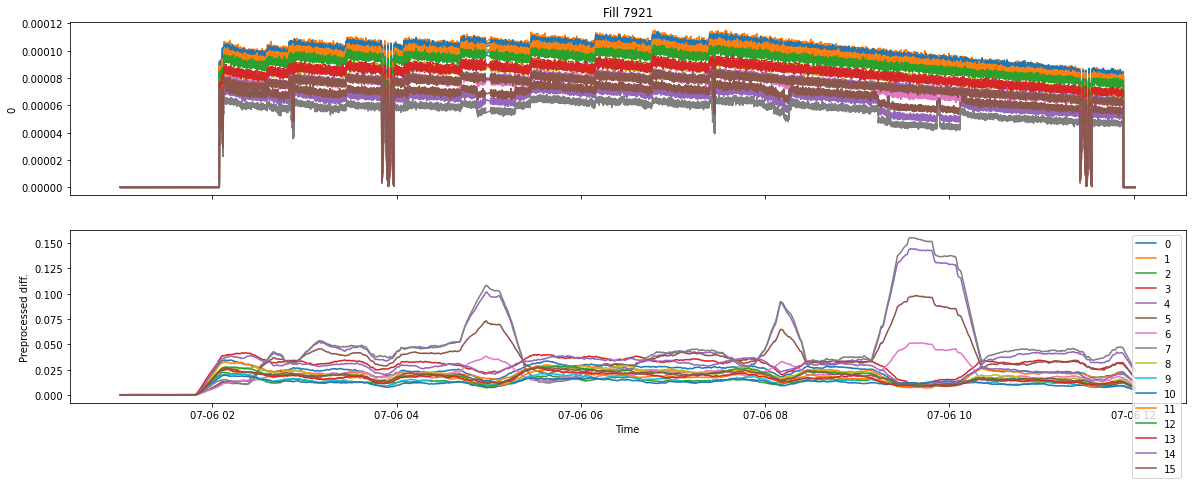

In [7]:
FILL_N = 7921
anomaly_dict = anm_searcher(FILL_N,
                            return_preprocessed=True,
                            generate_plots=True,
                            save_path = f"/afs/cern.ch/user/j/jmunozar/private/InProcess/anomalies_results")

In [8]:
anomaly_dict[0]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
index,,,,,,,,,,,,,,,,
2022-07-06 01:00:04.000000000,0.000082,0.000078,0.000050,0.000073,0.000076,0.000175,0.000250,0.000090,0.000076,0.000049,0.000072,0.000075,0.000081,0.000137,0.000083,0.000063
2022-07-06 01:00:05.025583320,0.000082,0.000078,0.000050,0.000073,0.000076,0.000175,0.000250,0.000090,0.000076,0.000049,0.000072,0.000075,0.000081,0.000137,0.000083,0.000062
2022-07-06 01:00:06.051166640,0.000082,0.000078,0.000050,0.000073,0.000076,0.000175,0.000250,0.000090,0.000076,0.000049,0.000072,0.000075,0.000081,0.000137,0.000083,0.000062
2022-07-06 01:00:07.076749960,0.000083,0.000078,0.000050,0.000073,0.000076,0.000175,0.000251,0.000090,0.000076,0.000049,0.000072,0.000075,0.000081,0.000136,0.000083,0.000062
2022-07-06 01:00:08.102333280,0.000083,0.000078,0.000050,0.000073,0.000077,0.000175,0.000251,0.000091,0.000076,0.000049,0.000072,0.000075,0.000081,0.000136,0.000083,0.000062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-06 12:00:45.872067960,0.012397,0.012024,0.007514,0.017023,0.023058,0.016073,0.009384,0.024744,0.008901,0.004938,0.004705,0.006867,0.007716,0.006388,0.011488,0.007548
2022-07-06 12:00:46.897651280,0.012376,0.012003,0.007510,0.016968,0.023035,0.016043,0.009374,0.024710,0.008895,0.004926,0.004677,0.006819,0.007708,0.006374,0.011459,0.007535
2022-07-06 12:00:47.923234600,0.012353,0.011979,0.007509,0.016921,0.023012,0.016011,0.009366,0.024674,0.008884,0.004916,0.004654,0.006773,0.007704,0.006363,0.011433,0.007524


In [37]:
import numpy as np
import pandas as pd
import seaborn as sns


In [ ]:
ch7 = anomaly_dict[0][7]
sns.lineplot(np.diff(ch7.values))


That is it, the report was generated and stored in `save_path`.

### Running for all files

In [9]:
if False:
    AnomalySearcher().run_scan(
        mount_path="/afs/cern.ch/user/j/jmunozar/private/ProjectsSummer2022/Files/mnt22",
        output_path="/afs/cern.ch/user/j/jmunozar/private/ProjectsSummer2022/MeetingResults",
        make_anomalous_plots=True,
        overwrite=False,
        progress_bar=True,
    )